# Árboles de decisión

## Análisis

**`Observación`**

- Los árboles de clasificación `se basan en una idea simple, pero poderosa`, y se encuentran entre las `técnicas más populares de clasificación`. Son sistemas de varias etapas, y la clasificación de un patrón en una clase se realiza de forma secuencial. `A través de una serie de pruebas, las clases se rechazan de forma secuencial hasta que se llega a una decisión a favor de una clase restante`. 

- Cada una de las pruebas, cuyo resultado decide qué clases se rechazan, es de `tipo binario "Sí" o "No" y se aplica a una sola característica`. Nuestro objetivo es presentar la filosofía principal en torno a un tipo especial de árboles conocidos como **`árboles de clasificación binarios ordinarios (OBCT)`**. Estos, pertenecen a una clase más general de métodos que construyen árboles, tanto para la clasificación como para la regresión, conocidos como `árboles de clasificación y regresión (CART)`.

**`Formulación`**

- La idea básica de los `OBCT` es `dividir el espacio de características en (hiper)rectángulos`; es decir, el espacio se divide mediante hiperplanos, que son paralelos a los ejes. Esto se ilustra en la {numref}`fig_decision_hypplanes_obct`

```{figure} ./imgs/decision_hypplanes_obct.png
:name: fig_decision_hypplanes_obct
:align: center
:scale: 60
Partición de espacio de características. Árbol de clasificación (OBCT). Fuente {cite}`theodoridis2020machine`.
```

- La partición del espacio en `(hiper)rectángulos` se realiza mediante una serie de `"preguntas"` de esta forma: `¿es el valor de la característica` $x_{i} < a$?. Este también se conoce como el `criterio de división`. La secuencia de preguntas puede realizarse de forma agradable mediante el uso de un árbol. La {numref}`fig_decision_tree_obct` muestra el árbol correspondiente al caso ilustrado
en la {numref}`fig_decision_hypplanes_obct`.

```{figure} ./imgs/decision_tree_obct.png
:name: fig_decision_tree_obct
:align: center
:scale: 60
Árbol de clasificación (OBCT). Partición del espacio para {numref}`fig_decision_hypplanes_obct`. Fuente {cite}`theodoridis2020machine`.
```

```{admonition} Observación
Cada nodo del árbol realiza una prueba contra una característica individual y, si este no es un `nodo hoja (sin división adicional)`, este es conectado a dos `nodos descendientes (nodo de decisión)`: uno está asociado a la `respuesta "Yes"` y el otro a la `respuesta "No"`.
```

- Partiendo del nodo raíz, se realiza un recorrido de decisiones sucesivas hasta llegar a un nodo hoja. `Cada nodo hoja está asociado a una única clase`. La `asignación de un punto a una clase se realiza según la etiqueta del nodo hoja correspondiente`. Este tipo de clasificación es conceptualmente simple y fácil de interpretar. Por ejemplo, en un `sistema de diagnóstico médico`, se puede empezar con una pregunta: `¿La temperatura es alta?` si la respuesta es afirmativa, una segunda pregunta puede ser: `¿Presenta moquea?`. El proceso continúa hasta que se llega a una `decisión final sobre la enfermedad`.

- Además, los árboles son útiles para `construir sistemas de razonamiento en la inteligencia artificial`. Por ejemplo, la existencia de objetos específicos, que se deduce a través de una serie de preguntas relacionadas, basadas en los valores de ciertas características (de alto nivel), puede conducir al `reconocimiento de una escena o de un objeto representado en una imagen`.

- Una vez desarrollado el árbol, la clasificación es sencilla. El mayor reto consiste en `construir el árbol, explotando la información que reside en el conjunto de datos de entrenamiento`. Las principales preguntas a las que uno se enfrenta al diseñar un árbol, entre otras que se discutirán más adelante, son:

    - `¿Qué criterio de división debe adoptarse?`
    - `¿Cuándo se debe detener el crecimiento de un árbol y declarar un nodo como final?`
    - `¿Cómo se asocia un nodo hoja a una clase concreta?`

**`Criterio de división`**: Ya hemos dicho que las preguntas que se hacen en cada nodo son del tipo

$$
\text{¿es}~x_{i} < a\text{?}
$$

- El objetivo es `seleccionar un valor adecuado para el umbral` $a$. Supongamos que, partiendo del nodo raíz, el árbol ha crecido hasta el `nodo actual` $t$. Cada nodo, $t$, está asociado a un subconjunto $X_{t}\subseteq X$ del `conjunto de datos de entrenamiento`, $X$. Este es el `conjunto de los puntos de entrenamiento que han sobrevivido a este nodo, después de las pruebas que han tenido lugar en los nodos anteriores del árbol`. 

- Por ejemplo, en la {numref}`fig_decision_tree_obct`, `un número de puntos, que pertenecen, digamos, a la clase` $\omega_{1}$, `no participarán en el nodo` $t_{1}$ porque `ya han sido asignados en un nodo hoja previamente etiquetado`. El propósito de un criterio de división es `dividir` $X_{t}$ `en dos subconjuntos disyuntos, digamos` $X_{tY}$`, y` $X_{tN}$`, dependiendo de la respuesta a la pregunta específica en el nodo` $t$. Para cada división, se cumple lo siguiente:

$$
\begin{align}
X_{tY}\cap X_{tN}&=\emptyset\\
X_{tY}\cup X_{tN}&=X_{t}
\end{align}
$$

- El objetivo en cada nodo es seleccionar qué característica se va a probar y también cuál es el mejor valor del umbral $a$. `La filosofía adoptada es hacer la elección de manera que cada división genere conjuntos,` $X_{tY}$,  $X_{tN}$`, que sean más homogéneos en cuanto a la clase en comparación con` $X_{t}$. En otras palabras, los datos en cada uno de los dos conjuntos descendientes deben mostrar una mayor preferencia por clases específicas, en comparación con el conjunto antecesor. 

- En la terminología adoptada, los conjuntos $X_{tY}$ y $X_{tN}$ `deben ser más puros en comparación con` $X_{t}$ . Así pues, primero debemos `seleccionar un criterio que mida la impureza` y, a continuación, `calcular el valor umbral y elegir la característica específica` (que se va a probar) para `maximizar la disminución de la impureza del nodo`.

- Por ejemplo, una `medida común para cuantificar la impureza del nodo,` $t$`, es la entropía`, definida como

$$
I(t)=-\sum_{m=1}^{M}P(\omega_{m}|t)\log_{2}P(\omega_{m}|t)
$$

````{figure} ./imgs/entropy_function.png
:name: entropy_function_fig
:align: center
:scale: 20

Función de entropía $I(t)$ para clasificación binaria.
````

- `El valor máximo de` $I(t)$ `se produce si todas las probabilidades son iguales (máxima impureza)`, y `el valor más pequeño, que es igual a cero, cuando sólo uno de los valores de probabilidad es uno y el resto es igual a cero`. Las probabilidades se aproximan como

$$
P(\omega_{m}|t)=\frac{N_{t}^{m}}{N_{t}},\quad m=1,2,\dots,M,
$$

- $N_{t}^{m}$ es el `número de puntos de la clase` $m$ `en` $X_{t}$, y $N_{t}$ el `número total de puntos en` $X_{t}$. La `disminución de la impureza del nodo`, tras dividir los datos en dos conjuntos, se define como

    $$
    \Delta I(t)=I(t)-\frac{N_{t_{Y}}}{N_{t}}I(t_{Y})-\frac{N_{t_{N}}}{N_{t}}I(t_{N}),
    $$

    donde $I(t_{Y})$ y $I(t_{N})$ son las `impurezas asociadas a los dos nuevos conjuntos`, respectivamente. Esto es, disminución de la impureza del nodo es la `diferencia entre la entropía de un nodo padre y la suma ponderada de las entropías de sus nodos hijos`. A esta última expresión $\Delta I(t)$, también se le conoce como `ganancia de información`.

```{admonition} Ejemplo: Cálculo de Entropía
:class: tip

Calculemos el `índice de entropía` $I(t)$ para `3 casos diferentes` de un conjunto con `4 balotas` de dos colores diferentes, `rojo y azul`:

- 4 balotas rojas y 0 balotas azules:

$$
\begin{align*}
I(t)&=-P(\text{rojo})\cdot\log_{2}(P(\text{rojo}))-P(\text{azul})\cdot\log_{2}(P(\text{azul}))\\
&=-\frac{4}{4}\cdot\log_{2}\frac{4}{4}-\frac{0}{4}\cdot\log_{2}\frac{0}{4}=0
\end{align*}
$$

- 2 balotas rojas y 2 balotas azules:

$$
\begin{align*}
I(t)&=-P(\text{rojo})\cdot\log_{2}(P(\text{rojo}))-P(\text{azul})\cdot\log_{2}(P(\text{azul}))\\
&=-\frac{2}{4}\cdot\log_{2}\frac{2}{4}-\frac{2}{4}\cdot\log_{2}\frac{2}{4}=1
\end{align*}
$$

- 3 balotas rojas y 1 balota azul:

$$
\begin{align*}
I(t)&=-P(\text{rojo})\cdot\log_{2}(P(\text{rojo}))-P(\text{azul})\cdot\log_{2}(P(\text{azul}))\\
&=-\frac{3}{4}\cdot\log_{2}\frac{3}{4}-\frac{1}{4}\cdot\log_{2}\frac{1}{4}=0.811
\end{align*}
$$
```

````{figure} ./imgs/entropy_decision_tree.png
:align: center
:name: trees_entropy_fig
:scale: 40

Pureza de nodos en un árbol de decisión. Fuente `towardsdatascience`.
````

- El objetivo ahora es `seleccionar la característica específica` $x_{i}$ `y el umbral` $a_{t}$ tal que, $\Delta I(t)$ sea máximo. Esto definirá ahora `dos nuevos nodos descendientes` de $t$, a saber, $t_{N}$ y $t_{Y}$; así, el árbol crece con dos nuevos nodos. Una forma de `buscar distintos valores umbral` es la siguiente:

    1. `Para cada una de las características` $x_{i},~i=1,2\dots,l$`, realice un ranking de los valores` $x_{in},~n=1,2,\dots,N_{t}$`, que toma esta característica entre los puntos en` $X_{t}$.
    2. A continuación, `defina una secuencia de valores umbral correspondientes`, $a_{in}$ `que estén en el medio, entre valores distintos consecutivos de` $x_{in}$
    3. Seguidamente, `compruebe el cambio de impureza que se produce para cada uno de estos valores umbral` y quédese con el que consiga la `máxima disminución`.
    4. `Repita el proceso para todas las características` y, por último, `quédese con la combinación que dé como resultado la mejor disminución máxima`.

- Además de la `entropía`, pueden utilizarse otros `índices de medición de impurezas`. Una alternativa popular, que da como resultado un `máximo ligeramente superior que el de entropía`, es el llamado `índice de Gini`, definido como

$$
I(t)=\sum_{m=1}^{M}P(\omega_{m}|t)(1-P(\omega_{m}|t)).
$$

- Este índice también es `cero si uno de los valores de probabilidad es igual a 1 y el resto son cero`, y toma
su valor `máximo cuando todas las clases son equiprobables`.

```{admonition} Regla de detención de división (stop-splitting)
:class: tip

- La pregunta obvia cuando crece un árbol es `cuándo dejar de cultivarlo`. Una forma posible es `adoptar un valor umbral, `$T$`, y dejar de dividir un nodo una vez que el valor máximo` $\Delta I(t)$`, para todas las divisiones posibles, sea menor que` $T$. 
- Otra posibilidad es parar cuando la cardinalidad de $X_{t}$ es menor que un número determinado o si el `nodo es puro, en el sentido de que todos los puntos que lo componen pertenecen a una única clase`.
```

```{admonition} Regla de asignación de clase
:class: tip
Una vez que se declara que un `nodo` $t$` es un nodo hoja, se le asigna una etiqueta de clase`; normalmente por mayoría. Es decir, `se le asigna la etiqueta de la clase a la que pertenecen la mayoría de los datos de` $X_{t}$.
```

```{admonition} Podado del árbol
:class: tip
- La experiencia ha demostrado que `el crecimiento de un árbol y el uso de una regla de parada no siempre funciona bien en la práctica`; el crecimiento puede detenerse antes de tiempo o puede dar lugar a árboles de tamaño muy grande. 
- Una práctica común es `hacer crecer primero un árbol hasta un tamaño grande y luego adoptar una técnica de poda para eliminar nodos`. Se pueden utilizar diferentes criterios de poda; uno muy popular es `combinar una estimación de la probabilidad de error con un índice de medición de la complejidad` {cite}`breiman1984cart, ripley2007pattern`.
```

```{prf:observation}
:label: observation_dt3

1. Entre las notables ventajas de los árboles de decisión está el hecho de que `pueden tratar de forma natural mezclas de variables numéricas y categóricas`. Además, `se adaptan bien a grandes conjuntos de datos`. `Pueden tratar eficazmente datos faltantes`. En muchos dominios, no se conocen todos los valores de las características para cada patrón. Los valores pueden no haber sido registrados, o pueden ser demasiado costosos de obtener.

2. Debido a su simplicidad estructural, son `fácilmente interpretables`; en otras palabras, `es posible que un humano entienda la razón de la salida del algoritmo de aprendizaje`. En algunas, como en las decisiones financieras, esto es un requisito legal. Por otro lado, `el rendimiento de predicción de los clasificadores de árbol no es tan bueno como el de otros métodos`, como las `máquinas de soporte vectorial` y las `redes neuronales`, que se tratarán en posteriores capítulos

3. Uno de los `principales inconvenientes asociados a los clasificadores de árbol es que son inestables`. Es decir, un `pequeño cambio en el conjunto de datos de entrenamiento puede dar lugar a un árbol muy diferente`. La razón de esto radica en la `naturaleza jerárquica de los clasificadores de árbol`. Un error que se produce en un nodo en un nivel alto del árbol se propaga hasta las hojas inferiores.
```

```{admonition} Bagging (Bootstrap Aggregating)
:class: tip
`Bagging (Bootstrap Aggregating)` es una técnica que puede `reducir la varianza y mejorar el rendimiento del error de generalización`.

- La idea básica es `crear un número de variantes` $B$, $~X_{1}, X_{2},\dots, X_{B}$`, del conjunto de entrenamiento,` $X$`, utilizando técnicas bootstrap`, mediante un muestreo uniforme de $X$ con reemplazo. 
- `Para cada una de las variantes del conjunto de entrenamiento,` $X_{i}$`, se construye un árbol,` $T_{i}$. 
- La decisión final para la clasificación de un punto dado es a favor de la `clase predicha por la mayoría de los arboles subclasificadores`, $T_{i}, i = 1, 2,\dots, B$ {cite}`breiman1996bagging`.
```

```{admonition} Bosques Aleatorios (Random Forest)
:class: tip
Los `Bosques Aleatorios (Random Forest) utilizan la idea de bagging junto con la selección aleatoria de características` {cite}`breiman2001random`. La diferencia con el bagging radica en la forma en que se construyen los árboles de decisión. 

- `La característica a dividir en cada nodo se selecciona como la mejor entre un conjunto de` $F$ `características elegidas al azar`, donde $F$ es un parámetro definido por el usuario. 
- Esta `aleatoriedad adicional introducida tiene un efecto sustancial en la mejora del rendimiento`. Los bosques aleatorios suelen tener una `precisión predictiva muy buena` y se han utilizado en una serie de aplicaciones, como el `reconocimiento de la postura del cuerpo en términos del popular sensor Kinect de Microsoft` {cite}`shotton2011real`.
```


- Además de los métodos anteriores, recientemente, también se han sugerido `técnicas Bayesianas utilizadas para estabilizar el rendimiento de los árboles`; véase {cite}`chipman2010bart, wu2007bayesian`. Por supuesto, `el efecto de utilizar múltiples árboles, es perder una de las principales ventajas de los árboles, su facilidad de interpretación.`

## Combinación de clasificadores

- Hasta ahora, hemos revisado en detalle una serie de clasificadores, y se presentarán más métodos en las siguientes secciones, relativos a las `máquinas de vectores de soporte` y las `redes neuronales`. La pregunta obvia a la que se enfrenta un profesional/investigador sin experiencia es: `¿qué método uso entonces? Por desgracia, no hay una respuesta definitiva.`

```{admonition} No free lunch theorem

- El objetivo del diseño de cualquier clasificador, y en general de cualquier esquema de aprendizaje es `proporcionar un buen rendimiento de generalización`. Sin embargo, no hay razones independientes del contexto o del uso para apoyar una técnica de aprendizaje en lugar de otra. 

- `Cada tarea de aprendizaje, representada por el conjunto de datos disponible, mostrará una preferencia por un esquema de aprendizaje específico` que se ajuste a las especificidades del problema en cuestión. 

- `Un algoritmo que obtiene la máxima puntuación en un problema puede obtener una puntuación baja en otro`. Esto se resume a veces como el **`Teorema de la no gratuidad (No free lunch theorem)`**
````



- En la práctica, hay que `probar diferentes métodos de aprendizaje dentro de los disponibles`, cada uno optimizado para la tarea específica, y `probar su rendimiento de generalización` con un conjunto de datos independiente distinto del utilizado para el entrenamiento, utilizando, por ejemplo, el método de exclusión o cualquiera de sus variantes. 

- A continuación, `se mantiene y se utiliza el método que ha obtenido la mejor puntuación para la tarea específica`. Con este fin, hay una serie de esfuerzos importantes para comparar diferentes clasificadores contra diferentes conjuntos de datos y `medir el rendimiento "medio", mediante el uso de diferentes índices estadísticos para cuantificar el rendimiento global de cada clasificador` frente a los conjuntos de datos.

**`Esquemas de combinación de clasificadores`**

- Una tendencia para `mejorar el rendimiento` es `combinar diferentes clasificadores y explotar sus ventajas individuales`. Una observación que justifica este enfoque es que, durante las pruebas, `hay patrones en los que incluso el mejor clasificador para una tarea concreta no logra predecir su verdadera clase`. En cambio, `los mismos patrones pueden ser clasificados correctamente por otros clasificadores, con un rendimiento global inferior`. 

- Esto muestra que puede haber cierta `complementariedad entre los distintos clasificadores`, y la combinación puede conducir a un `mayor rendimiento en comparación con el obtenido por el mejor (único) clasificador`. Recordemos que `el bagging mencionado anteriormente, es un tipo de combinación de clasificadores`. La cuestión que se plantea ahora es seleccionar un `esquema de combinación`. Hay diferentes esquemas, y los resultados que proporcionan pueden ser diferentes. A continuación, `resumimos los esquemas de combinación más populares`.

```{admonition} Regla de la media aritmética
Suponiendo que utilizamos $L$ clasificadores, en los que `cada uno da un valor de probabilidad posterior`, $P_{j}(\omega_{i}|\boldsymbol{x}), i = 1,2,\dots,M,~j = 1, 2, . . . L$, la decisión sobre `la asignación de la clase se basa en la siguiente regla`:

$$
\text{Asignar}~\boldsymbol{x}~\text{a la clase}~\omega_{i}=\textrm{arg}\max_{k}\frac{1}{L}\sum_{j=1}^{L}P_{j}(\omega_{k}|\boldsymbol{x}),\quad k=1,2,\dots,M.
$$

Esta regla equivale a calcular la `probabilidad posterior "final"`, $P(\omega_{i}|\boldsymbol{x})$, por medio de `minimización de la distancia media de Kullback-Leibler`

$$
D_{av}=\frac{1}{L}\sum_{j=1}^{L}D_{j},~\text{donde}~D_{j}=\sum_{i=1}^{M}P_{j}(\omega_{i}|\boldsymbol{x})\ln\frac{P_{j}(\omega_{i}|\boldsymbol{x})}{P(\omega_{i}|\boldsymbol{x})}.
$$
```

```{admonition} Regla de promedio geométrica
Esta regla es el resultado de `minimizar la formulación alternativa de distancia de Kullback-Leibler` (nótese que esta distancia no es simétrica); en otras palabras

$$
D_{j}=\sum_{i=1}^{M}P(\omega_{i}|\boldsymbol{x})\ln\frac{P(\omega_{i}|\boldsymbol{x})}{P_{j}(\omega_{i}|\boldsymbol{x})},
$$

lo que da lugar a

$$
\text{Asignar}~\boldsymbol{x}~\text{a la clase}~\omega_{i}=\textrm{arg}\max_{k}\prod_{j=1}^{L} P_{j}(\omega_{k}|\boldsymbol{x}),\quad k=1,2,\dots,M.
$$
```

```{admonition} Apilamiento (Stacking)
Una forma alternativa es utilizar una `media ponderada de las salidas de los clasificadores individuales`, donde `los pesos de la combinación se obtienen de forma óptima utilizando los datos de entrenamiento`. Supongamos que la salida de cada `clasificador individual`, $f_{j}(x)$, es de tipo suave (`infinitamente diferenciable`); por ejemplo, una estimación de probabilidad posterior, como antes. Entonces, `la salida combinada viene dada por`

$$
f(\boldsymbol{x})=\sum_{j=1}^{L}\omega_{j}f_{j}(\boldsymbol{x}),
$$

donde `los pesos son estimados vía la siguiente tarea de optimización`:

$$
\hat{\boldsymbol{\omega}}=\textrm{arg}\min_{\boldsymbol{\omega}}\sum_{n=1}^{N}\mathcal{L}(y_{n}, f(\boldsymbol{x}_{n}))=\textrm{arg}\min_{\boldsymbol{\omega}}\sum_{n=1}^{N}\mathcal{L}\left(y_{n}, \sum_{j=1}^{L}\omega_{j}f_{j}(\boldsymbol{x}_{n})\right)
$$

donde, $\mathcal{L}(\cdot,\cdot)$ es una `función de pérdida`; por ejemplo, la del `error cuadrático`.
```

- Sin embargo, `adoptar la anterior optimización, basada en el conjunto de datos de entrenamiento, puede conducir a un sobreajuste`. De acuerdo con el apilamiento {cite}`wolpert1992stacked` se adopta un `razonamiento de validación cruzada` y en lugar de $f_{j}(\boldsymbol{x}_{n})$, empleamos $f_{j}^{(-n)}(\boldsymbol{x}_{n})$, donde este último es la `salida del` $j$`-ésimo clasificador entrenado en los datos tras excluir el par` $(y_{n}, x_{n})$. En otras palabras, los pesos se estiman mediante 

$$
\hat{\boldsymbol{\omega}}=\text{argmin}_{\boldsymbol{\omega}}\sum_{n=1}^{N}\mathcal{L}\left(y_{n}, \sum_{j=1}^{L}\omega_{j}f_{j}^{(-n)}(\boldsymbol{x}_{n})\right).
$$

- A veces, `las ponderaciones tienen que ser positivas y sumar uno`, lo que da lugar a una tarea de `optimización restringida`.

```{admonition} Regla de votación por mayoría
Los métodos anteriores pertenecen a la familia de reglas `soft-type`. Una alternativa popular es una regla `hard-type`, que se basa en un `esquema de votación`. `Se decide a favor de la clase para la que hay consenso o al menos` $l_{c}$ `clasificadores están de acuerdo en la etiqueta de clase`, donde

$$
l_{c}=
\begin{cases}
\displaystyle{\frac{L}{2}+1}, & L~\text{es par}\\
\displaystyle{\frac{L+1}{2}}, & L~\text{es impar}
\end{cases}
$$
    
`En caso contrario, la decisión es de rechazo` (es decir, no se toma ninguna decisión).
```

```{admonition} Reglas del Tipo: Hard-Soft
:class: tip

Una `regla de clasificación soft` generalmente `estima las probabilidades condicionales de clase de forma explícita y, a continuación, realiza la predicción de clase basada en la mayor probabilidad estimada`. Por el contrario, la `clasificación hard` omite el requisito de estimar la probabilidad de la clase y `estima directamente el límite de clasificación`.
```

```{admonition} Regla de la mediana

Cuando `valores atípicos están presentes`, se puede utilizar en su lugar el valor de la `mediana`:

$$
\text{Asignar}~\boldsymbol{x}~\text{a la clase}~\omega_{i}=\textrm{arg}\max_{k}\textrm{median}\{P_{j}(\omega_{k}|\boldsymbol{x})\},~k=1,2,\dots,M.
$$

- Ocurre que, el `no free lunch theorem` también es válido para las reglas de combinación; `no hay una regla universalmente óptima`. Todo depende de los datos de que se disponga; véase {cite}`jain2000statistical`. Hay otras cuestiones relacionadas con la teoría de la combinación de clasificadores; por ejemplo, `¿cómo se eligen los clasificadores que se van a combinar? ¿Deben ser dependientes o independientes?`. 

- Además, `la combinación no implica necesariamente una mejora del rendimiento, en algunos casos, se puede experimentar una pérdida de rendimiento (mayor tasa de error) en comparación con el mejor clasificador (único)`. Por tanto, `la combinación debe realizarse con cuidado` {cite}`kuncheva2014combining, koutroumbas2008pattern`.

## Enfoque Boosting

```{prf:observation}
:label: observation_dt1

¿**Un algoritmo de aprendizaje débil**, es decir, uno que funciona ligeramente mejor que una adivinación aleatoria, **puede convertirse en uno fuerte con un buen índice de rendimiento**?.
```

- El `enfoque boosting` es un procedimiento para `combinar o "reforzar (boost)" el rendimiento de los clasificadores débiles`(clasificadores cuyas estimaciones de parámetros suelen ser imprecisas y ofrecen un rendimiento deficiente) con el fin de `obtener un mejor clasificador`. Se diferencia del `bagging` en que es un *procedimiento determinista y genera conjuntos de entrenamiento y clasificadores secuencialmente, basándose en los resultados de la iteración anterior*. En cambio, el bagging genera los conjuntos de entrenamiento aleatoriamente y puede generar los clasificadores en paralelo.

````{admonition} Observación
:class: tip
- **Boosting** *asigna un peso a cada patrón en el conjunto de entrenamiento, reflejando su importancia*, y *construye un clasificador utilizando el conjunto de entrenamiento y el conjunto de pesos*. Por lo tanto, **requiere un clasificador que pueda manejar pesos en las muestras de entrenamiento** (algunos clasificadores pueden ser incapaces de admitir patrones ponderados). 

- En este caso, se puede *muestrear un subconjunto de los ejemplos de entrenamiento de acuerdo con la distribución de los pesos* (ponderación de muestras de entrenamiento) y *utilizar estos ejemplos para entrenar al clasificador en la siguiente etapa de la iteración*. El aprendiz final se obtiene mediante una *media ponderada de todos los aprendices de base (débiles) jerárquicamente diseñados*. Por lo tanto, el boosting también puede considerarse un *esquema para combinar diferentes aprendices*.
````

- Dado un *número suficiente de iteraciones, se puede mejorar significativamente lo (pobre) del aprendiz débil*. Por ejemplo, en algunos casos de clasificación, el *error de entrenamiento puede tender a cero a medida que aumenta el número de iteraciones*. El entrenamiento de un clasificador *mediante una manipulación adecuada de los datos de entrenamiento* (de hecho, *el mecanismo de ponderación identifica las muestras difíciles, las que siguen fallando, y pone más énfasis en ellas*) *se puede obtener un clasificador fuerte*. Por supuesto, como veremos más adelante, el hecho de que el error de entrenamiento tienda a cero no significa necesariamente que el error de prueba llegue a cero.

```{figure} ./imgs/boosted_tree.jpg
:name: boosted_tree_numref
:align: center
:scale: 90
Ilustración del `Arbol Boosting`: Fuente {cite}`kiangala2021effective`.
```

```{admonition} Algoritmo AdaBoost (Adaptive Boosting)

Considere una *tarea de clasificación de dos clases* y supongamos que se nos da un conjunto de $N$ *observaciones de entrenamiento*, $(y_{n}, \boldsymbol{x}_{n}),~n=1,2,\dots,N$, con $y_{n}\in\{-1, 1\}$. Nuestro objetivo es *diseñar un clasificador binario*,

$$
f(\boldsymbol{x})=\text{sgn}\{F(\boldsymbol{x})\}
$$(sign_fn_adaboost_eq)

donde

$$
F(\boldsymbol{x}):=\sum_{k=1}^{K}a_{k}\phi(\boldsymbol{x};\boldsymbol{\theta}_{k}),
$$(adaboosting_model_eq)

y $\phi(\boldsymbol{x}; \boldsymbol{\theta}_{k})\in\{-1, 1\}$, es el *clasificador base en la iteración* $k$, definido en términos de un *conjunto de parámetros*, $\boldsymbol{\theta}_{k},~k=1,2,\dots, K$ *a ser estimados*.

- El clasificador base se selecciona como uno binario. El conjunto de *parámetros desconocidos se obtienen mediante* `step-wise` y de forma `greedy`; es decir, en cada iteración $i$, *solo optimizamos con respecto a un único par*, $(a_{i}, \boldsymbol{\theta}_{i})$ *manteniendo los parámetros* $a_{k}, \boldsymbol{\theta}_{k},~k=1,2,\dots,i-1$, *obtenidos en los pasos anteriores, fijos*.

- Nótese que *lo ideal sería optimizar respecto a todos los parámetros desconocidos*, $a_{k}$, $k=1,2,\dots,K$, *simultáneamente*, sin embargo, esto conduciría a una *tarea de optimización muy exigente, desde el punto de vista computacional*. Los algoritmos `greedy` son muy populares debido a su *simplicidad computacional*, y conducen a un muy *buen rendimiento en una amplia gama de tareas de aprendizaje*. 
```

- Supongamos que *nos encontramos en el paso de iteración* $i$*-ésimo*; consideremos la *suma parcial* de términos

$$
F_{i}(\cdot)=\sum_{k=1}^{i}a_{k}\phi(\cdot; \boldsymbol{\theta}_{k}).
$$

- Entonces, podemos escribir la siguiente *recursion*

    $$
    F_{i}(\cdot)=F_{i-1}(\cdot)+a_{i}\phi(\cdot; \boldsymbol{\theta}_{i}),\quad i=1,2,\dots,K,
    $$
  
    partiendo de una *condición inicial*. Con base en el *razonamiento greedy*, $F_{i-1}(\cdot)$ *se supone conocido* y el objetivo es *optimizar con respecto al conjunto de parámetros* $a_{i},~\boldsymbol{\theta}_{i}$.

- Para la *tarea de optimización*, debe adoptarse una *función de pérdida*. Sin duda, *existen diferentes opciones, que dan distintos nombres al algoritmo derivado*. Una función de pérdida popular, utilizada para la clasificación, es la **pérdida exponencial**, definida como

    $$
    \mathcal{L}(y, F(\boldsymbol{x}))=\exp(-yF(\boldsymbol{x})):\quad\text{exponential loss function},
    $$

    y da lugar al **algoritmo boosting adaptativo (AdaBoost)**.

```{figure} ./imgs/loss_fn_adaboost.png
:name: loss_fn_adaboost_fig
:align: center
:scale: 80
Pérdida 0-1, exponencial, log-loss y error al cuadrado. Fuente {cite}`theodoridis2020machine`.
```

- La función de *pérdida exponencial*, junto con la función de *pérdida 0-1*, se muestran en {numref}`loss_fn_adaboost_fig`. *La primera puede considerarse un límite superior (diferenciable) de la función de pérdida 0-1 (no diferenciable)*. 

- Observe que **la pérdida exponencial coloca más peso sobre los errores de clasificación** $(yF(\boldsymbol{x}) < 0)$ **en comparación con los correctamente identificados** $(yF(\boldsymbol{x}) > 0)$. Empleando la función de *pérdida exponencial*, el conjunto $a_{i},\boldsymbol{\theta}_{i}$ se obtiene mediante la respectiva **función de coste empírica**, de la siguiente manera:

$$
\begin{align*}
(a_{i}, \boldsymbol{\theta}_{i})&=\text{arg}\text{min}_{a,\boldsymbol{\theta}}\sum_{n=1}^{N}\mathcal{L}(y_{n}, F(\boldsymbol{x}_{n}))\\
&=\text{arg}\text{min}_{a,\boldsymbol{\theta}}\sum_{n=1}^{N}\exp\left(-y_{n}(F_{i-1}(\boldsymbol{x}_{n})+a\phi(\boldsymbol{x}_{n};\boldsymbol{\theta}))\right).
\end{align*}
$$(costfn_adaboost_eq)

- Esta *tarea de optimización* también se realiza en dos pasos. En primer lugar, $a$ **se trata de forma fija y optimizamos con respecto a** $\boldsymbol{\theta}$,

    $$
    \begin{align*}
    \boldsymbol{\theta}_{i}&=\text{arg}\text{min}_{a,\boldsymbol{\theta}}\sum_{n=1}^{N}\exp\left(-y_{n}(F_{i-1}(\boldsymbol{x}_{n})+a\phi(\boldsymbol{x}_{n};\boldsymbol{\theta}))\right)\\
    &=\text{argmin}_{\boldsymbol{\theta}}\sum_{n=1}^{N}\omega_{n}^{(i)}\exp(-y_{n}a\phi(\boldsymbol{x}_{n};\boldsymbol{\theta})),
    \end{align*}
    $$(weights_omega_eq)

    donde $\omega_{n}^{(i)}:=\exp(-y_{n}F_{i-1}(\boldsymbol{x}_{n})),~n=1,2,\dots,N.$

- Observe que $\omega_{n}^{(i)}$ *no depende ni de* $a$ *ni de* $\phi(x_{n}; \boldsymbol{\theta})$, por lo que puede considerarse un **peso asociado a la muestra** $n$. Además, *su valor depende por completo de los resultados obtenidos en las pruebas anteriores*.

- Ahora nos centraremos en el coste de Ecuación {eq}`costfn_adaboost_eq`. La **optimización depende de la forma específica del
clasificador base**. Nótese, sin embargo, que la *función de pérdida es de forma exponencial*. Además, el *clasificador
es binario*, de modo que $\phi(\boldsymbol{x}, \boldsymbol{\theta})\in\{-1, 1\}$.

- Si *suponemos que* $a > 0$ (volveremos a ello pronto) la optimización de Ecuación {eq}`costfn_adaboost_eq` se ve fácilmente que es equivalente a *optimizar el siguiente coste*:

    $$
    \boldsymbol{\theta}_{i}=\text{argmin}_{\theta}P_{i},~\text{donde}~P_{i}:=\sum_{n=1}^{N}\omega_{n}^{(i)}\chi_{(-\infty, 0]}(y_{n}\phi(\boldsymbol{x}_{n}, \boldsymbol{\theta})),
    $$(loss_funtion_01)

    y $\chi_{(-\infty, 0]}$ es la *función de pérdida 0-1*.

- En otras palabras, **solo contribuyen los puntos mal clasificados** ($y_{n}\phi(\boldsymbol{x}_{n}; \boldsymbol{\theta}) < 0$). Nótese que $P_{i}$ es el **error ponderado del clasificador empírico**. Claramente, cuando se minimiza el error de clasificación en la Ecuación {eq}`loss_funtion_01`, el coste de Ecuación {eq}`costfn_adaboost_eq` *también se minimiza, porque la pérdida exponencial coloca mayor peso a los puntos mal clasificados* (cota superior para $\chi_{(-\infty, 0]}$). 

- Para garantizar que $P_{i}$ permanece en el intervalo $[0, 1]$, *los pesos son normalizados a la unidad dividiendo por la suma respectiva*; nótese que esto no afecta al proceso de optimización. En otras palabras, $\boldsymbol{\theta}_{i}$ **puede calcularse para minimizar el error de clasificación empírico, cometido por el clasificador base**. Para clasificadores base de estructura muy simple, **dicha minimización es computacionalmente factible**.

- Una vez calculado el $\boldsymbol{\theta}_{i}$ óptimo, a partir de las respectivas definiciones,

    $$
    \sum_{y_{n}\phi(\boldsymbol{x}_{n}; \boldsymbol{\theta}_{i})<0}\omega_{n}^{(i)}=P_{i},~\text{y}~\sum_{y_{n}\phi(\boldsymbol{x}_{n}; \boldsymbol{\theta}_{i})>0}\omega_{n}^{(i)}=1-P_{i}.
    $$(Pi_eq)

- *Combinando* las Ecuaciones {eq}`Pi_eq`-{eq}`weights_omega_eq`, se demuestra fácilmente que

$$
a_{i}=\text{argmin}_{a}\{\exp(-a)(1-P_{i})+\exp(a)P_{i}\}.
$$

- *Si se toma la derivada con respecto a* $a$ *y se iguala a cero*, se obtiene

$$
\frac{\partial}{\partial a_{i}}(\exp(-a_{i})(1-P_{i})+\exp(a_{i})P_{i})=0\Leftrightarrow a_{i}=\frac{1}{2}\ln\frac{1-P_{i}}{P_{i}}.
$$

- *Nótese que si* $P_{i} < 0.5$*, entonces* $a_{i} > 0$*, que es lo que se espera en la práctica*. **Una vez estimados** $a_{i}$ **y** $\boldsymbol{\theta}_{i}$ **las ponderaciones para la siguiente iteración vienen dadas por**

    $$
    \omega_{n}^{(i+1)}=\frac{\exp(-y_{n}F_{i}(\boldsymbol{x}_{n}))}{Z_{i}}=\frac{\omega_{n}^{(i)}\exp(-y_{n}a_{i}\phi(\boldsymbol{x}_{n}, \boldsymbol{\theta}_{i}))}{Z_{i}},
    $$

    donde $Z_{i}$ es el ***factor normalizado***

    $$
    Z_{i}:=\sum_{n=1}^{N}\omega_{n}^{(i)}\exp(-y_{n}a_{i}\phi(\boldsymbol{x}_{n}; \boldsymbol{\theta}_{i})).
    $$

- Si se observa la forma en que se forman los pesos, se puede comprender uno de los principales secretos subyacentes al algoritmo **AdaBoost: El peso asociado a una muestra de entrenamiento** $\boldsymbol{x}_{n}$ **aumenta (disminuye) con respecto a su valor en la iteración anterior, dependiendo de si el patrón ha fallado (tenido éxito) respecto a su valor en la iteración anterior**.

- Además, el **porcentaje de disminución (aumento) depende del valor de** $a_{i}$, **que controla la importancia relativa en la construcción del clasificador final**. Las *muestras difíciles, que siguen fallando en iteraciones sucesivas, ganan importancia en su participación en el valor de error empírico ponderado*.

- Para el caso del *AdaBoost*, puede demostrarse que el error de entrenamiento tiende a cero exponencialmente rápido. El esquema se resume en el siguiente algoritmo, introducido por *Yoav Freund y Robert Schapire* quienes recibieron el prestigioso *premio Gödel* por este algoritmo en 2003.

```{prf:algorithm} Algoritmo AdaBoost
:label: adaboost_algo

**Inicialización**

1. Inicializa: $\omega_{n}^{(1)}=1/N,~i=1,2,\dots,N$
2. Inicializa: $i=1$

**Repeat**

1. Calcular el óptimo $\boldsymbol{\theta}_{i}$ en $\phi(\cdot; \boldsymbol{\theta}_{i})$ minimizando $P_{i}$
2. Calcular el óptimo $P_{i}$
3. $a_{i}=\displaystyle{1/2[\ln(1-P_{i})/P_{i}]}$
4. $Z_{i}=0$
5. **For** $n=1,2,\dots,N$, **Do**:
	1. $\omega_{n}^{(i+1)}=\omega_{n}^{(i)}\exp(-y_{n}a_{i}\phi(\boldsymbol{x}_{n}; \boldsymbol{\theta}_{i}))$
	2. $Z_{i}=Z_{i}+\omega_{n}^{(i+1)}$
6. **End For**
7. **For** $n=1,2,\dots,N$, **Do**:
	1. $\omega_{n}^{(i+1)}=\omega_{n}^{(i+1)}/Z_{i}$
8. **End For**
9. $K=i$
10. $i=i+1$
11. **Until** Un criterio de parada se cumpla.
12. $f(\cdot)=\text{sgn}\left(\sum_{k=1}^{K}a_{k}\phi(\cdot, \boldsymbol{\theta}_{k})\right)$ 
```

````{admonition} Observación
:class: tip

- El enfoque propuesto implica la partición del conjunto de datos en dos subconjuntos: uno de entrenamiento y otro de prueba. El primero se emplea para el entrenamiento del algoritmo, mientras que en cada iteración se evalúa la pérdida binaria 0-1 en el conjunto de prueba. Se observa una **disminución garantizada de la pérdida exponencial en el conjunto de entrenamiento y, por lo general, también de la pérdida binaria 0-1**. 
- Aunque los **errores en el conjunto de prueba suelen disminuir al principio del algoritmo, llega un punto en el que comienzan a aumentar significativamente**. Cuando esto sucede, revertimos el clasificador a la forma que dio el mejor error de prueba y descartamos cualquier cambio posterior (es decir, clasificadores débiles adicionales).
````

## La función Log-Loss

- En `AdaBoost`, se empleó la `función de pérdida exponencial`. Desde un punto de vista teórico, esto puede
justificarse con el siguiente argumento. Consideremos el `valor medio con respecto a la etiqueta binaria,` $y$, de
la `función de pérdida exponencial`

$$
\mathbb{E}(\exp(-yF(\boldsymbol{x})))=P(y=1)\exp(-F(\boldsymbol{x}))+P(y=-1)\exp(F(\boldsymbol{x}))
$$(mean_exp_loss_fn_eq)

- Tomando `derivada con respecto a` $F(\boldsymbol{x})$ `e igualando a cero`, fácilmente obtenemos el mínimo de {eq}`mean_exp_loss_fn_eq` el cual ocurre en

$$
\frac{\partial}{\partial F(\boldsymbol{x})}(\mathbb{E}(\exp(-yF(\boldsymbol{x}))))=0\Leftrightarrow F_{\star}(\boldsymbol{x})=\text{argmin}_{f}\mathbb{E}[\exp(-yf)]=\frac{1}{2}\ln\frac{P(y=1|\boldsymbol{x})}{P(y=-1|\boldsymbol{x})}
$$(min_exp_loss_fn_eq)

- El logaritmo de la proporción del lado derecho se conoce como la `proporción log-odds`. Por lo tanto, si se considera la función de minimización en Ecuación {eq}`costfn_adaboost_eq` como la aproximación empírica del valor medio en Ecuación {eq}`mean_exp_loss_fn_eq`, `se justifica plenamente considerar el signo de la función en` Ecuación {eq}`sign_fn_adaboost_eq` `como regla de clasificación`.

- Un problema importante asociado a la `función de pérdida exponencial`, como se ve fácilmente en la {numref}`loss_fn_adaboost_fig`, es que `pondera en gran medida las muestras clasificadas erróneamente`, dependiendo del valor del margen respectivo, definido como

$$
m_{x}:=|yF(\boldsymbol{x})|.
$$

- Tenga en cuenta que `cuanto más lejos esté el punto de la superficie de decisión` ($F(x) = 0$)`, mayor será el valor de` $|F(x)|$. Por lo tanto, los `puntos que se encuentran en el lado equivocado de la superficie de decisión` ($yF(x) < 0$) y lejos son (exponencialmente) grandes, y `su influencia en el proceso de optimización es grande` en comparación con los demás puntos. Así pues, `en presencia de valores atípicos, la pérdida exponencial no es la más adecuada`. De hecho, en tales entornos, el `rendimiento de AdaBoost puede degradarse drásticamente`.

- Una función de pérdida alternativa es la `log-loss o desviación binomial` (ver Figura {numref}`loss_fn_adaboost_fig`), definida como

$$
\mathcal{L}(y, F(\boldsymbol{x})):=\ln(1+\exp(-yF(\boldsymbol{x}))):\quad\text{log-loss function},
$$

- Nótese que su `incremento es casi lineal para valores negativos grandes`. Tal función conduce a una `influencia más equilibrada de la pérdida entre todos los puntos`. Observe además que la función que minimiza la media de la pérdida logarítmica, con respecto a $y$, es la misma que la dada en Ecuación {eq}`min_exp_loss_fn_eq` (`verifíquelo`). Sin embargo, si se emplea la pérdida logarítmica en lugar de la exponencial, la tarea de optimización es más compleja, y hay que recurrir a esquemas de optimización de tipo `gradiente descendiente` o esquemas de `optimización de tipo Newton` (ver {cite}`friedman2001greedy`).

## Arboles Boosting

```{prf:observation}
:label: observation_dt2

- En la discusión sobre la comparación experimental de varios métodos, se afirmó que **los árboles boosting se encuentran entre los esquemas de aprendizaje más potentes para la clasificación y la minería de datos**. Por lo tanto, merece la pena dedicar más tiempo a este tipo especial de técnicas de boosting.
```

- A partir de los conocimientos adquiridos hasta ahora, no es difícil ver que la *salida de un árbol puede escribirse de forma compacta como*

    $$
    T(\boldsymbol{x}, \boldsymbol{\Theta})=\sum_{j=1}^{J}\hat{y}_{j}\chi_{R_{j}}(\boldsymbol{x}),
    $$

    donde $J$ es el **número de nodos hoja**, $R_{j}$ es la **región asociada a la hoja** $j$ tras la *partición espacial* impuesta por el árbol, $\hat{y}_{j}$ es la **etiqueta respectiva asociada a** $R_{j}$ (valor de salida/predicción para la regresión), y $\chi$ es nuestra conocida **función característica**.

- El conjunto de *parámetros*, $\boldsymbol{\Theta}$, se compone de $(\hat{y}_{j}, R_{j} ), j = 1, 2,\dots, J$, que *se estiman durante el entrenamiento*. Estos se pueden obtener mediante la **selección de una función de coste adecuada**. También se suelen emplear técnicas subóptimas, para construir un árbol, como las analizadas en la primera sección.

- En un modelo de árbol boosting, el **clasificador base está formado por un árbol**. En la práctica, se pueden emplear *árboles cuyo tamaño (**la profundidad máxima es la mayor longitud posible entre la raíz y una hoja**) no debe ser muy grande, para acercarse más a un clasificador débil*. Normalmente, **valores de** $J$ **entre 4 y 8** son aconsejables. El modelo de **árbol boosting** puede escribirse como

$$
F(\boldsymbol{x})=\sum_{k=1}^{K}T(\boldsymbol{x}; \boldsymbol{\Theta}_{k}),\quad\text{donde}\quad T(\boldsymbol{x}; \boldsymbol{\Theta}_{k})=\sum_{j=1}^{J}\hat{y}_{kj}\chi_{R_{kj}}(\boldsymbol{x}).
$$(bost_tree_model_eq)

- La Ecuación {eq}`bost_tree_model_eq` es básicamente la misma que Ecuación {eq}`adaboosting_model_eq`, con el coeficiente $a_{k}$ igual a uno. Hemos supuesto que el *tamaño de todos los árboles es el mismo*, aunque no tiene por qué ser así. Adoptando una *función de pérdida* $\mathcal{L}$ y la `lógica greedy` utilizada para el enfoque boosting más general, llegamos al siguiente esquema recursivo de optimización:

$$
\boldsymbol{\Theta}_{i}=\text{argmin}_{\boldsymbol{\Theta}}\sum_{n=1}^{N}\mathcal{L}(y_{n}, F_{i-1}(\boldsymbol{x}_{n})+T(\boldsymbol{x}_{n}; \boldsymbol{\Theta})).
$$(rec_optimization_eq)

- La *optimización* con respecto a $\boldsymbol{\Theta}$ tiene lugar en *dos pasos: uno con respecto a* $\hat{y}_{ij},~j=1,2,\dots,J$, dado $R_{ij}$ , y luego *uno con respecto a las regiones* $R_{ij}$. Esta última es una tarea difícil y solo se simplifica en casos muy especiales. En la práctica, se pueden emplear varias aproximaciones. Nótese que en el caso de la *pérdida exponencial* y la *tarea de clasificación de dos clases*, lo anterior está directamente relacionado con el esquema `AdaBoost`.

- En `Python` el modelo `XGBoost` (*Adaboost regularizado*), se considera la suma de todos los errores divididos por el número de muestras, y utiliza las siguientes funciones de pérdida `binary:logistic` ($-y(\log(\tilde{y}))+(1-y)\log(1-\tilde{y})$), `reg:logistic` ($(y-\tilde{y})^{2}$) y para clasificación múltiple [multi:softmax, multi:softprob](https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters).

- Para casos más generales, se recurre a **esquemas de optimización numérica**. *El mismo razonamiento se aplica a los árboles de regresión, donde ahora se utilizan funciones de pérdida para la regresión, como el error al cuadrado o el valor de error absoluto*. Estos esquemas también se conocen como árboles de regresión aditiva múltiple (MART).

- Hay dos factores críticos en relación con los árboles boosting. Uno es el tamaño de los árboles, $J$, y el otro es la elección de $K$. En cuanto al **tamaño de los árboles**, normalmente se prueban diferentes tamaños, $4\leq J \leq 8$, y se selecciona el mejor. Con respecto al **número de iteraciones**, para valores grandes, el error de entrenamiento puede llegar a ser cercano a cero, pero el error de prueba puede aumentar debido al sobreajuste. Por lo tanto, hay que **parar lo suficientemente pronto, normalmente controlando el rendimiento**.

- Otra forma de **hacer frente al sobreajuste** es emplear **métodos de contracción (shrinkage)**, que suelen ser **equivalentes a la regularización**. Por ejemplo, en la expansión por etapas de $F_{i}(x)$ utilizada en el paso de optimización Eq {eq}`rec_optimization_eq`, se puede adoptar lo siguiente:

$$
F_{i}(\cdot)=F_{i-1}(\cdot)+\nu T(\cdot; \boldsymbol{\theta}_{i}).
$$

- El parámetro $\nu$ toma valores pequeños y puede considerarse que **controla la tasa de aprendizaje del procedimiento boosting**. Se aconsejan valores inferiores a $\nu < 0.1$. Sin embargo, *cuanto menor sea el valor de* $\nu$, *mayor deberá ser el valor de* $K$ *para garantizar un buen rendimiento*.

# Implementación

## Control de complejidad

- Al construir un árbol como se describe en esta sección, hasta que todas las hojas sean puras, da lugar a modelos muy complejos y muy ajustados a los datos de entrenamiento. `La presencia de hojas puras significa que un árbol es 100% preciso en el conjunto de entrenamiento`; cada punto de datos del conjunto de entrenamiento está en una hoja que tiene la clase mayoritaria correcta. 

- Hay dos estrategias comunes para evitar el overfitting: `detener la creación del árbol antes de tiempo (también llamada prepoda), o construir el árbol, pero luego eliminar o colapsar nodos que contienen poca información (también llamada poda posterior o simplemente poda)`. Los posibles criterios para la `prepoda` incluyen la `limitación de la profundidad máxima del árbol, limitar el número máximo de hojas, o exigir un número mínimo de puntos en un nodo para seguir dividiéndolo`.

- Los árboles de decisión en `scikit-learn` se implementan en las clases `DecisionTreeRegressor` y `DecisionTreeClassifier`. `scikit-learn` sólo implementa la pre-poda, no la post-poda. Veamos el efecto de la poda a priori con más detalle en el conjunto de datos de cáncer de mama. Como siempre, importamos el conjunto de datos y lo dividimos en una parte de entrenamiento y otra de prueba. A continuación, construimos un  modelo utilizando la configuración por defecto de desarrollo completo del árbol (extendiendo el árbol hasta que todas las hojas sean puras). Fijamos el `random_state` en el árbol, que se utiliza para ruptura interna de de los lazos. Nótese que seleccionamos `stratify=cancer.target`, los datos se dividen de forma estratificada, utilizando `cancer.target` como las etiquetas de clase (ver [stratified](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)).

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)

In [3]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


- Aquí la función `score` como en la mayoría de clasificadores, devuelve la precisión media en los datos de prueba y las etiquetas dadas. Como era de esperar, `la precisión en el conjunto de entrenamiento es del 100%`, ya que las hojas son puras, el árbol creció lo suficiente como para poder memorizar perfectamente todas las etiquetas de los datos de entrenamiento. `La precisión del conjunto de prueba es ligeramente peor que la de los modelos lineales` que vimos anteriormente, que tenían una precisión de alrededor del 95%.

- Si no restringimos la profundidad de un árbol de decisión, el árbol puede llegar a ser arbitrariamente profundo y complejo. `Los árboles no podados son, por tanto, son propensos a sobreajustarse y a no generalizar bien a los nuevos datos`. Ahora apliquemos la pre-poda, la cual que dejará de desarrollar el árbol antes de ajustarse perfectamente a los datos de entrenamiento. Una opción es dejar de construir el árbol después de alcanzar una cierta profundidad. En este caso,`establecemos que la profundidad máxima sea de 4 (max_depth=4), lo que significa que sólo se pueden formular cuatro preguntas consecutivas`. La limitación de la profundidad del árbol disminuye el sobreajuste. Esto conduce a una menor precisión en el conjunto de entrenamiento, pero una mejora en el conjunto de prueba

In [4]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## Análisis de los árboles de decisión

- Podemos visualizar un árbol de decisión utilizando la función `export_graphviz` del módulo `tree`. Esta función escribe un archivo en el formato `.dot` de archivo de texto para almacenar gráficos. Establecemos una opción para colorear los nodos, para reflejar la clase mayoritaria en cada nodo y pasamos los nombres de las clases y las características para que el árbol pueda ser etiquetado correctamente. El argumento `impurity` está relacionado con la probabilidad de que clasifiquemos incorrectamente un nuevo punto de datos de forma incorrecta, normalmente calculada mediante la métrica de entropia `giny` la cual se aborda teóricamente en la sección anterior.

In [5]:
from sklearn.tree import export_graphviz

In [6]:
export_graphviz(tree,
                out_file="tree.dot", 
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, 
                impurity=False, 
                filled=True)

- Podemos leer este archivo y visualizarlo, utilizando el modulo `graphviz` (o puede utilizar cualquier programa que pueda leer archivos `.dot`). Para que funcione `Graphviz` deberá además realizar la siguiente instalación, la cual es la única dependencia (ver [Graphviz Instalación](https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224))

In [7]:
import graphviz

In [8]:
with open("tree.dot") as f:
    dot_graph = f.read()
    graph = graphviz.Source(dot_graph)

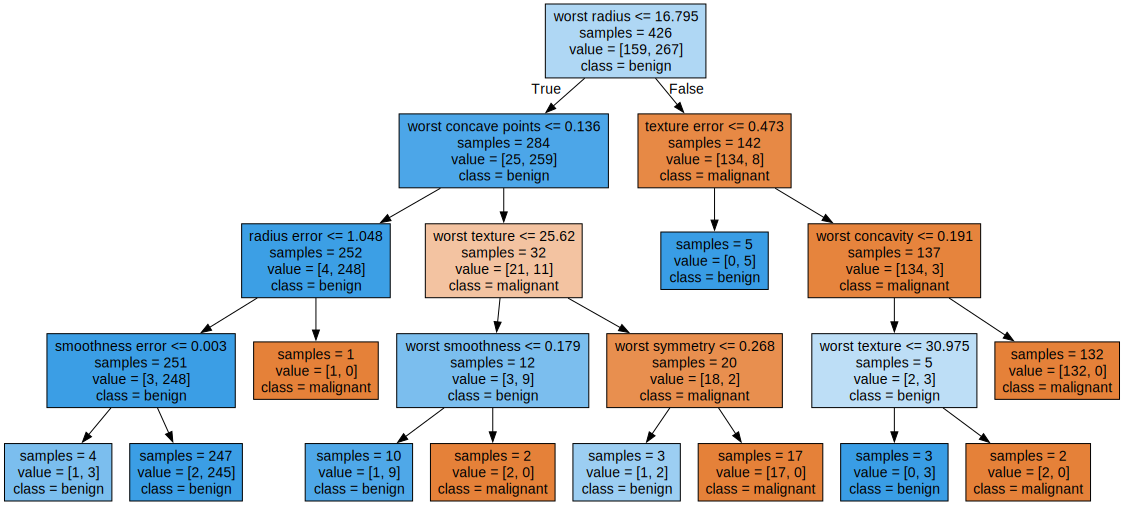

In [9]:
graphviz.Source(dot_graph)

- La visualización del árbol proporciona una `gran visión en profundidad de cómo el algoritmo realiza predicciones, y es un buen ejemplo de un algoritmo de aprendizaje automático que puede fácilmente explicarse a no expertos`. Sin embargo, incluso con un árbol de profundidad cuatro, como se ve aquí, el árbol puede resultar un poco abrumador. Los árboles más profundos (una profundidad de 10 puede ser común) son aún más difíciles de entender. 

- Un método de inspección del árbol que puede ser útil es, averiguar qué camino toma realmente la mayoría de los datos. `Las n_samples que se muestran en cada nodo de la figura, entregan el número de muestras en ese nodo`, mientras que `value provee el número de muestras por clase`. Siguiendo las ramas hacia la derecha, vemos que el `worst radius` $\leq$ `16.795` crea un nodo que contiene sólo `8 muestras benignas pero 134 muestras malignas. El resto de este lado del árbol utiliza entonces algunas distinciones más finas para separar estas 8 muestras benignas restantes`. De las 142 muestras que fueron a la derecha en la división inicial, casi todas ellas (132) terminan en la hoja de la derecha. Tomando la izquierda en la raíz, para el `worst radio > 16.795` terminamos con `25 muestras malignas y 259 muestras benignas`. Casi todas las muestras benignas acaban en la segunda hoja de la derecha, y la mayoría de las demás hojas contienen muy pocas muestras.

## Características importantes en los árboles

- En lugar de mirar todo el árbol, lo que puede ser agotador, hay algunas `propiedades útiles que podemos derivar para resumir el funcionamiento del árbol`. El resumen más utilizado es el de las `características importantes, que califica la importancia de cada característica para la decisión que toma el árbol`. Es un número entre 0 y 1 para cada característica, donde 0 significa "no se utiliza en absoluto" y 1 significa "predice perfectamente el objetivo". Las características siempre suman 1

- Otra `excelente manera de visualizar predicciones a partir de un random forest por ejemplo, es utilizando la librería` [LIME](https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-lime/notebook) `de Python`. Con esta librería se pueden generar por cada instancias, figuras de cartaterísticas importantes y representar sus probabilidades de pertenecer a la clase predicha (`pruebela`).

In [10]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


- Podemos visualizar las importancias de las características de forma similar a la forma en que visualizamos los coeficientes en el modelo lineal

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

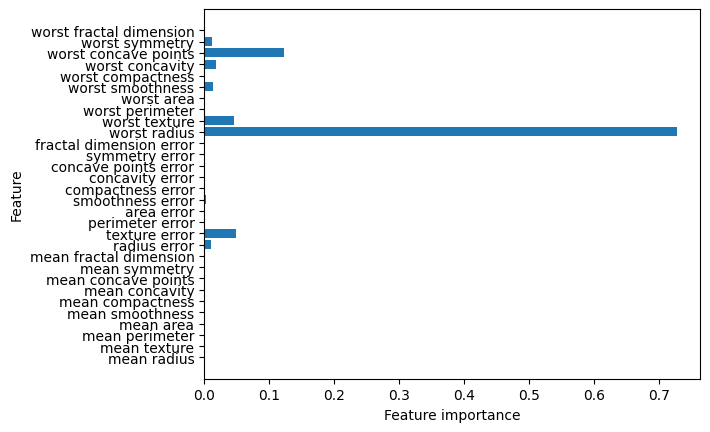

In [13]:
plot_feature_importances_cancer(tree)

- Aquí vemos que la característica utilizada en la división superior `("worst radio")` es, con mucho, la más importante. Esto confirma nuestra observación al analizar el árbol de que el primer nivel ya separa bastante bien las dos clases. Sin embargo, si una característica tiene un `feature_importance` bajo, no significa que esta característica sea poco informativa. Solo significa que la característica no fue elegida por el árbol, probablemente porque otra característica codifica la misma información.
  
- Un valor **negativo** de importancia de característica significa que **la característica aumenta la pérdida**. Esto indica que tu modelo no está haciendo un buen uso de esta característica. Esto podría significar que tu modelo está mal ajustado (no tiene suficientes iteraciones y no ha utilizado la característica lo suficiente) o que **la característica no es útil, por lo que podría intentar eliminarla para mejorar la calidad final**.

- A diferencia de los coeficientes de los modelos lineales, `las importancias de las características son siempre positivas y no codifican la clase de la que es indicativa una característica`. Las `feature_importance` nos dicen que el `"worst radio"` es importante, pero **no si un** `"worst radio"` **alto es indicativo de que una muestra es benigna o maligna**.

- De hecho, puede que no haya una relación tan sencilla entre las características y la clase, como se puede ver en el siguiente ejemplo. La siguiente figura muestra un conjunto de datos bidimensional en el que `la característica en el eje` $y$ `tiene una relación no monótona con la etiqueta de clase, y los límites de decisión encontrados por un árbol de decisión`

In [14]:
import mglearn

Feature importances: [0. 1.]


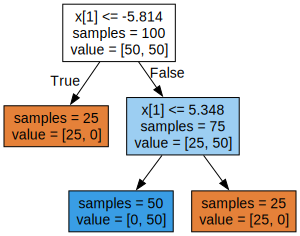

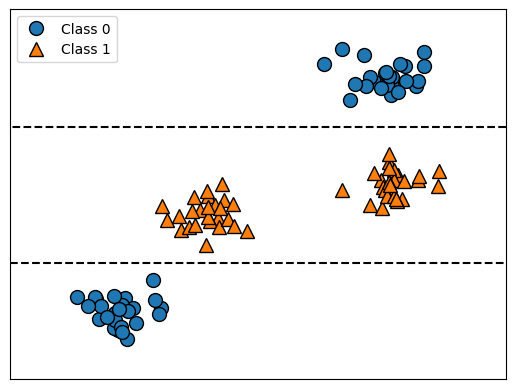

In [15]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

- El gráfico muestra un conjunto de datos con dos características y dos clases. Aquí, toda la información está contenida en `X[1]` , y `X[0]` no se utiliza en absoluto. Pero la relación entre X[1] y la clase de salida no es monótona, lo que significa que no podemos decir `"un valor alto de X[0] significa la clase 0, y un valor bajo significa la clase 1" (o viceversa)`. Aunque hemos centrado nuestra discusión aquí en los árboles de decisión para la clasificación, todo lo que se ha dicho es igualmente cierto para los árboles de decisión para la regresión, como se implementa en `DecisionTreeRegressor`. 

- El uso y análisis de los árboles de regresión es muy similar al de los árboles de clasificación. Hay una propiedad particular del uso de modelos basados en árboles para regresión que queremos señalar, sin embargo, `DecisionTreeRegressor (y todos los otros modelos de regresión basados en árboles) no son capaces de extrapolar, o hacer predicciones fuera del rango de los datos de entrenamiento`. Veamos esto con más detalle, utilizando un conjunto de datos de los precios históricos de la memoria de los ordenadores (RAM). La siguiente figura muestra el conjunto de datos, con la fecha en el eje $x$ y el precio de un megabyte de RAM en ese año en el eje $y$:

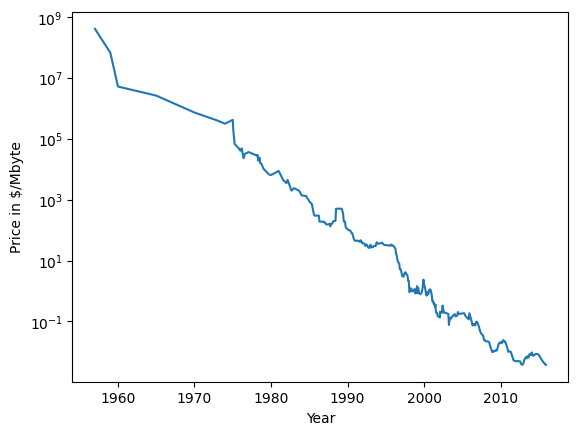

In [16]:
import pandas as pd
ram_prices = pd.read_csv("https://raw.githubusercontent.com/lihkir/Data/main/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price);
plt.xlabel("Year");
plt.ylabel("Price in $/Mbyte");

- Nótese que en la escala logarítmica del eje $y$, `la relación parece ser bastante lineal y, por tanto, debería ser relativamente fácil de predecir`. Vamos a hacer una predicción para los años posteriores al 2000 utilizando los datos históricos hasta esa fecha como única característica. Compararemos dos modelos sencillos: un `DecisionTreeRegressor` y `LinearRegression`. 

- Cambiamos la escala de los precios utilizando un logaritmo, para que la relación sea relativamente lineal. Esto no supone ninguna diferencia para el `DecisionTreeRegressor`, pero supone una gran diferencia para el `LinearRegression`. Después de entrenar los modelos y hacer predicciones, aplicamos la función exponencial para deshacer la transformación del logaritmo. Realizamos predicciones sobre todo el conjunto de datos para su visualización, pero para una evaluación cuantitativa, sólo consideraríamos el conjunto de datos de prueba

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

- Utilizamos los datos históricos para prever los precios después del año 2000. `Realizamos predicción de los precios en función de la fecha`. Utilizamos una transformación logarítmica para obtener una relación más sencilla de los datos con el objetivo

In [18]:
data_train = ram_prices[ram_prices.date < 2000]
data_test  = ram_prices[ram_prices.date >= 2000]

In [19]:
X_train = np.array(data_train.date)[:, None] # Vector columna
y_train = np.log(data_train.price)

In [20]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = np.array(ram_prices.date)[:, None]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

- Realizamos una figura para comparar las predicciones del árbol de decisión y del modelo de regresión lineal con la los datos reales de entrenamiento y de prueba

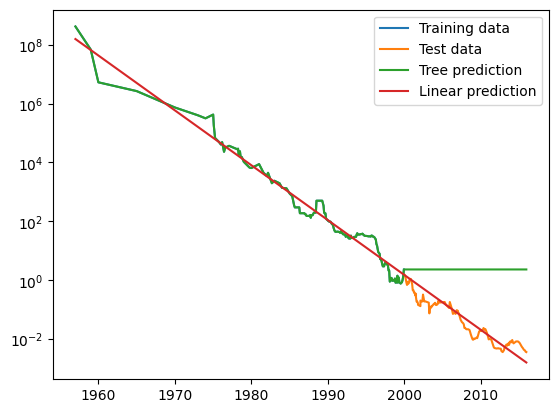

In [21]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend();

- La diferencia entre los modelos es bastante sorprendente. El modelo lineal se aproxima a los datos con una línea, como sabíamos que haría. Esta línea proporciona una previsión bastante buena para los datos de prueba (los años posteriores al 2000), mientras que pasa por alto algunas de las variaciones más finas en los datos de entrenamiento y de prueba. `El modelo de árbol, por su parte, hace predicciones perfectas sobre los datos de entrenamiento`, no restringimos la complejidad del árbol, por lo que aprendió de memoria todo el conjunto de datos. Sin embargo, `una vez que salimos del rango para el que el arbol tiene datos, el modelo simplemente sigue prediciendo el último punto conocido`. El árbol no tiene la capacidad para generar `"nuevas"` respuestas, fuera de lo que se vio en los datos de de entrenamiento. Esta deficiencia se aplica a todos los modelos basados en árboles.

**`Puntos fuertes, puntos débiles y parámetros`**

- Como ya se ha comentado, los parámetros que controlan la complejidad del modelo en los árboles de decisión son los parámetros de pre-selección que detienen la construcción del árbol antes de que esté completamente desarrollado. Por lo general, la elección de una de las estrategias de pre-poda y configuración de: `max_depth, max_leaf_nodes, min_samples_leaf` es suficiente para evitar el overfitting de la misma.

- Los árboles de decisión tienen dos ventajas sobre muchos de los algoritmos que hemos analizado hasta ahora: `el modelo resultante puede ser fácilmente visualizado y entendido por personas no expertas (al menos para los árboles más pequeños)`, y los `algoritmos son completamente invariables a la escala de los datos`. Como `cada característica se procesa por separado`, y las posibles divisiones de los datos no dependen de la escala, no es necesario un preprocesamiento como la normalización o la estandarización de las características para los algoritmos de árboles de decisión. 

- En particular, los árboles de decisión funcionan bien cuando se tienen características que están en escalas completamente diferentes, o una mezcla de características binarias y continuas. `El principal inconveniente de los árboles de decisión es que, incluso con el uso de la pre-poda, tienden a sobreajustarse y a proporcionar un pobre rendimiento de generalización`. Por lo tanto, en la mayoría de las aplicaciones, los `métodos combiandos` que analizamos a continuación suelen utilizarse en lugar de un único árbol de decisión.

## Ensamble de árboles de decisión

- `Los ensambles son métodos que combinan múltiples modelos de aprendizaje automático para crear modelos más potentes`. Hay muchos modelos en la literatura de aprendizaje automático que pertenecen a esta categoría, pero hay dos modelos de ensamble que han demostrado su eficacia en una amplia gama de conjuntos de datos de clasificación y regresión, ambos utilizan árboles de decisión como bloques de construcción: los `random forest` y los `gradient boosted decision trees.`

**`Bosques aleatorios`**

- Como acabamos de observar, uno de los principales inconvenientes de `los árboles de decisión es que tienden a sobreajustar los datos de entrenamiento. Los bosques aleatorios son una forma de abordar este problema`. Un bosque aleatorio es esencialmente una colección de árboles de decisión, donde cada árbol es ligeramente diferente de de los demás. La idea detrás de los bosques aleatorios es que cada árbol puede hacer un trabajo de predicción relativamente bien, pero es probable que se ajuste demasiado a una parte de los datos. `Si construimos muchos árboles, todos los cuales funcionan bien y se ajustan en exceso de diferentes maneras, podemos reducir la cantidad de sobreajuste promediando sus resultados`. Esta reducción de overfitting, al tiempo que se mantiene el poder de predicción de los árboles se puede verificar matemáticamente.

- Para poner en práctica esta estrategia, tenemos que construir muchos árboles de decisión. Cada árbol debe hacer un trabajo aceptable de predicción del objetivo, y también debe ser diferente de los otros árboles. Los bosques aleatorios reciben su nombre de la inyección de aleatoriedad en la construcción de árboles para garantizar que cada árbol sea diferente. Hay dos formas de aleatorizar los árboles de un bosque aleatorio: `seleccionando los puntos de datos utilizados para construir un árbol y seleccionando las características en cada prueba de división`. Veamos este proceso con más detalle.

**`Construcción de bosques aleatorios`**

- Para construir un modelo de bosque aleatorio (`random forest`), hay que decidir el número de árboles a construir (el parámetro `n_estimators` de `RandomForestRegressor` o `RandomForestClassifier`). Digamos que queremos construir 10 árboles. Estos árboles se construirán de forma completamente independiente unos de otros, y `el algoritmo hará elecciones aleatorias diferentes para cada árbol con el fin de asegurarse de que los árboles son distintos`. 

- Para construir un árbol, primero tomamos lo que se llama una `muestra bootstrap` de nuestros datos. Es decir, a partir de nuestras `n_samples` (puntos de datos), extraemos repetidamente un ejemplo al azar con reemplazo (lo que significa que la misma muestra puede ser elegida varias veces), `n_samples` veces. Esto creará un conjunto de datos que es tan grande como el conjunto de datos original, pero en el que faltarán algunos puntos de dato (aproximadamente un tercio), y algunos se repetirán.

- Para ilustrarlo, digamos que queremos crear una `muestra bootstrap` de la lista `['a', 'b', 'c', 'd']`. Una posible muestra bootstrap sería `['b', 'd', 'd', 'c']`. Otra muestra posible sería `['d', 'a', 'd', 'a']`. A continuación, `se construye un árbol de decisión basado en este conjunto de datos (muestra bootstrap) recién creado`. Sin embargo, el algoritmo que hemos descrito para el árbol de decisión se ha modificado ligeramente. En lugar de buscar la mejor prueba para cada nodo, el algoritmo `selecciona aleatoriamente un subconjunto de características y busca la mejor prueba posible que incluya una de estas características`.

- El número de características que se seleccionan se controla con el parámetro `max_features`. La selección de un subconjunto de características se repite por separado en cada nodo, de modo que `cada nodo de un árbol puede tomar una decisión utilizando un subconjunto diferente de las características`. `El muestreo bootstrap hace que cada árbol de decisión del bosque aleatorio se construya en un conjunto de datos ligeramente diferente`. Debido a la selección de características en cada nodo, cada división de cada árbol opera con un subconjunto diferente de características. Juntos, estos dos mecanismos aseguran que todos los árboles del bosque aleatorio son diferentes.

- En este proceso el parámetro `max_features` es crítico. Si establecemos `max_features` en `n_features`, `significa que cada división puede mirar todas las características del conjunto de datos, y no se inyectará aleatoriedad ninguna en la selección de características` (la aleatoriedad debida al bootstrap permanece, sin embargo). Si establecemos `max_features en 1, esto significa que las divisiones no tienen ninguna opción sobre qué característica probar`, y sólo pueden buscar sobre diferentes umbrales para la característica que fue seleccionada  al azar. Por lo tanto, un `max_feature` significa que los árboles del bosque aleatorio serán bastante similares y podrán con facilidad ajustarse a los datos, utilizando las características más distintivas. `Un max_features bajo significa que los árboles del bosque aleatorio serán bastante diferentes, y que cada árbol puede necesitar ser muy profundo para ajustarse bien a los datos`.

- Para hacer una predicción utilizando el bosque aleatorio, el algoritmo realiza primero una predicción para cada árbol del bosque. `Para la regresión, podemos promediar estos resultados para obtener nuestra predicción final`. Para la clasificación, se utiliza una estrategia de `"votación suave"`. Esto significa que cada algoritmo hace una predicción `"suave"`, proporcionando una probabilidad para cada posible etiqueta de salida. `Las probabilidades predichas por todos los árboles se promedian y se predice la clase con la mayor probabilidad`.

**`Análisis de los bosques aleatorios`**. Apliquemos un bosque aleatorio compuesto por cinco árboles al conjunto de datos `two_moons`

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

- `Los árboles que se construyen como parte del bosque aleatorio se almacenan en estimator_attribute`. Visualicemos los límites de decisión aprendidos por cada árbol, junto con su predicción agregada

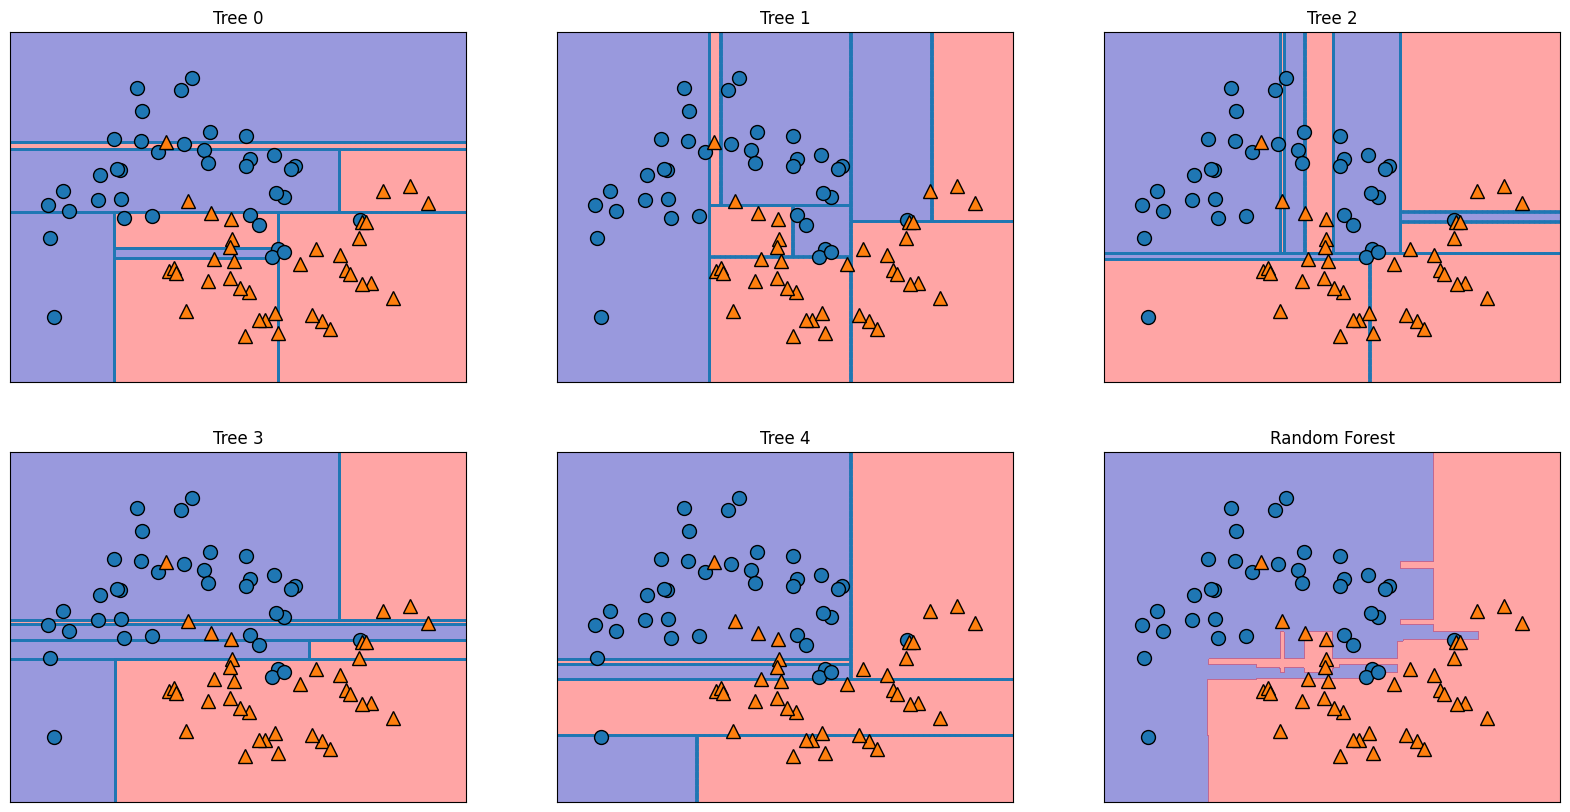

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train);

- Se puede ver claramente que los límites de decisión aprendidos por los cinco árboles son bastante diferentes. Cada uno de ellos comete algunos errores, ya que algunos de los puntos que se representan aquí no se incluyeron en los conjuntos de entrenamiento de los árboles, debido al muestreo bootstrap. `El bosque aleatorio se ajusta menos que cualquiera de los árboles por separado y proporciona un límite de decisión mucho más intuitivo`. En cualquier aplicación real, utilizaríamos muchos más árboles (a menudo cientos o miles), lo que daría lugar a límites aún más suaves.

- Como otro ejemplo, apliquemos un bosque aleatorio compuesto por 100 árboles en el conjunto de datos `Breast Cancer`

In [26]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


- `El bosque aleatorio nos da una precisión del 97%, mejor que los modelos lineales o un árbol de decisión único, sin necesidad de ajustar ningún parámetro`. Podríamos ajustar la configuración de `max_features`, o aplicar la pre-selección como hicimos con el árbol de decisión simple. Sin embargo, a menudo los parámetros por defecto del bosque aleatorio ya funcionan bastante bien. `Al igual que el árbol de decisión, el bosque aleatorio proporciona importancias de características, que se calculan agregando las importancias de las características en los árboles del bosque`. Normalmente, las `importancias de las características proporcionadas por el bosque aleatorio son más fiables que las proporcionadas por un solo árbol`.

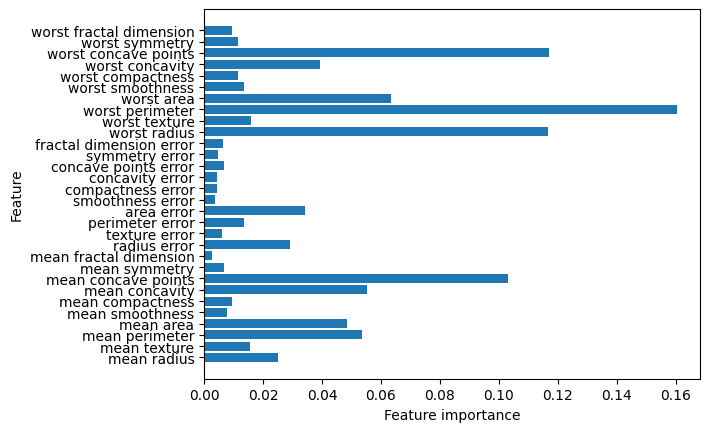

In [28]:
plot_feature_importances_cancer(forest)

- Como puede ver, `el bosque aleatorio da una importancia no nula a muchas más características que el árbol simple`. Al igual que el árbol de decisión simple, el bosque aleatorio también da importancia a la característica `"worst radius"`, pero en realidad elige `"worst perimeter"` como la `característica más informativa`. `La aleatoriedad en la construcción del bosque aleatorio obliga al algoritmo a considerar muchas explicaciones posibles`. El resultado es que el bosque aleatorio capta una imagen mucho más amplia de los datos que un árbol simple.

```{admonition} Observación
:class: tip

La `importancia de la característica` se calcula como la disminución de la impureza del nodo ponderada por la probabilidad de alcanzar ese nodo. `La probabilidad del nodo puede calcularse mediante el número de muestras que llegan al nodo, dividido por el número total de muestras. Cuanto mayor sea el valor, más importante será la característica`.La `impureza de Gini` se calcula mediante la formula usada al inicio de esta sección

$$
I(t)=\sum_{m=1}^{M}P(\omega_{m}|t)(1-P(\omega_{m}|t)).
$$

```

**`Puntos fuertes, puntos débiles y parámetros`**

- Los bosques aleatorios para la regresión y la clasificación se encuentran actualmente entre los métodos de aprendizaje automático más utilizados. `Son muy potentes, suelen funcionar bien sin necesidad de ajustar mucho los parámetros y no requieren el escalado de los datos`. Esencialmente, los bosques aleatorios comparten todos los beneficios de los árboles de decisión, mientras que compensan algunas de sus deficiencias. Una razón para seguir utilizando los árboles de decisión es, **`si se necesita una representación compacta del proceso de toma de decisiones`**. Es básicamente imposible interpretar decenas o cientos de árboles en detalle, y los árboles de los bosques aleatorios tienden a ser más profundos que los árboles de decisión (debido al uso de subconjuntos de características). Por lo tanto, si se necesita resumir las predicciones de forma visual para los no expertos, un único árbol de decisión puede ser la mejor opción. 

- Aunque la construcción de bosques aleatorios en grandes conjuntos de datos puede llevar algo de tiempo, `se puede paralelizar a través de múltiples núcleos de CPU dentro de un ordenador fácilmente`. Si utiliza un procesador multinúcleo (como casi todos los ordenadores modernos),  puede utilizar el parámetro `n_jobs` para ajustar el número de núcleos a utilizar. El uso de más núcleos de la CPU dará lugar a un aumento lineal de la velocidad (utilizando dos núcleos, el entrenamiento del bosque aleatorio será el doble de rápido), pero especificar `n_jobs` mayor que el número de núcleos no ayudará. `Puede establecer n_jobs=-1 para utilizar todos los núcleos en su ordenador`.

- Debe tener en cuenta que los bosques aleatorios, por su naturaleza, son aleatorios, y establecen diferentes estados aleatorios (o no establecen el `random_state` en absoluto) puede cambiar drásticamente el modelo que se construye. `Cuanto más árboles haya en el bosque, más robusto será frente a la elección del estado aleatorio`. Si quiere tener resultados reproducibles, es importante fijar el `random_state` a caulquier número entero. `Los bosques aleatorios no tienden a funcionar bien en datos muy dimensionales y escasos, como los datos de texto`. Para este tipo de datos, los modelos lineales pueden ser más apropiados. Los bosques aleatorios suelen funcionar bien incluso en conjuntos de datos muy grandes, y el entrenamiento se puede paralelizar fácilmente en muchos núcleos de la CPU de un ordenador potente.  Sin embargo, `los bosques aleatorios requieren más memoria y son más lentos de entrenar y predecir que los modelos lineales`. Si el tiempo y la memoria son importantes en una aplicación, puede tener sentido utilizar un modelo lineal en su lugar.

- Los parámetros importantes a ajustar son `n_estimators , max_features`, y posiblemente opciones de pre-poda como `max_depth`. En el caso de `n_estimators`, un número mayor es siempre mejor. `Promediar más árboles dará lugar a un conjunto más robusto al reducir el sobreajuste`. Sin embargo, hay rendimientos decrecientes, y más árboles necesitan más memoria y más tiempo para entrenar. Una regla común es construir "tantos como tenga tiempo/memoria".  Como se ha descrito anteriormente, `max_features` determina el grado de aleatoriedad de cada árbol, y un `max_features pequeño reduce el sobreajuste`. En general, es una buena regla general utilizar los valores por defecto: `max_features=sqrt(n_features)` para la clasificación y `max_features=log2(n_features)` para la regresión. Añadir `max_features` o `max_leaf_nodes` puede mejorar a veces el rendimiento. También puede reducir drásticamente los requisitos de espacio y tiempo para el entrenamiento y la predicción.

**`Árboles de regresión de gradiente reforzado (máquinas de gradiente reforzado)`**

- El árbol de regresión de gradiente reforzado es otro método de conjunto que combina múltiples árboles de decisión. A pesar de la `"regresión"` en el nombre, estos modelos pueden utilizarse para la regresión y la clasificación. A diferencia del enfoque de bosque aleatorio, `el refuerzo de gradiente funciona construyendo árboles en forma de serie, en el que cada árbol trata de corregir los errores del anterior`. Por defecto, no hay aleatoriedad en los árboles de regresión de gradiente; en su lugar, `se utiliza una fuerte pre-poda`. Los árboles de impulso por gradiente suelen utilizar árboles muy poco profundos, de una a cinco profundidades, lo que hace que el modelo sea más pequeño en términos de memoria y que las predicciones sean más rápidas.

- La idea principal del `gradient boosting` es combinar muchos modelos simples (en este contexto conocidos como aprendices débiles), como árboles poco profundos. Cada árbol sólo puede proporcionar buenas predicciones sobre una parte de los datos, por lo que se añaden más y más árboles para mejorar el rendimiento. `Los árboles con refuerzo de gradiente suelen ser los ganadores de los concursos de aprendizaje automático y se utilizan mucho en la industria`. Suelen ser un poco más sensibles a los ajustes de los parámetros que los bosques aleatorios, pero pueden proporcionar una mayor precisión si los parámetros se ajustan correctamente.

- Aparte de la pre-poda y el número de árboles en el conjunto, otro parámetro importante del gradient boosting es la `tasa de aprendizaje, que controla la intensidad con la que cada árbol trata de corregir los errores de los árboles anteriores`. Una tasa de aprendizaje alta significa que cada árbol puede hacer correcciones más fuertes, lo que permite modelos más complejos. Si se añaden más árboles al conjunto, lo que puede conseguirse aumentando `n_estimators`, también aumenta la complejidad del modelo, ya que éste tiene más oportunidades de corregir errores en el conjunto de entrenamiento.

- Este es un ejemplo del uso del clasificador `GradientBoosting` en el conjunto de datos del `Breast Cancer`. Por defecto, se utilizan 100 árboles de profundidad máxima 3 y una tasa de aprendizaje de 0.1

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
cancer = load_breast_cancer()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


- Como la `precisión del conjunto de entrenamiento es del 100%, es probable que estemos sobreajustando. Para reducir el sobreajuste, podemos aplicar una pre-poda más fuerte limitando la profundidad máxima o reducir la tasa de aprendizaje`

In [31]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [32]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


- Ambos métodos para disminuir la complejidad del modelo `redujeron la precisión del conjunto de entrenamiento, como era de esperar`. En este caso, `la reducción de la profundidad máxima de los árboles proporcionó una mejora significativa del modelo, mientras que la reducción de la tasa de aprendizaje sólo aumentó la precisión del conjunto de entrenamiento ligeramente`. En cuanto a los otros modelos basados en árboles de decisión, podemos volver a visualizar las características para obtener más información sobre nuestro modelo. Como utilizamos 100 árboles, es poco práctico inspeccionarlos todos, aunque todos tengan una profundidad de 1.

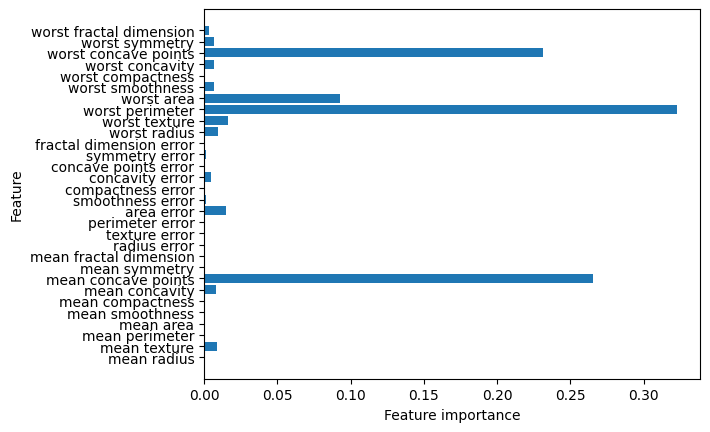

In [33]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

- Podemos ver que las importancias de las características de los árboles `gradient-boost` son algo similares a las de los bosques aleatorios, aunque el refuerzo del gradiente ignora por completo algunas de las características. Como tanto el refuerzo de gradiente como los bosques aleatorios funcionan bien en tipos de datos similares, `un enfoque común es probar primero los bosques aleatorios, que funcionan con bastante solidez. Si los bosques aleatorios funcionan bien, pero el tiempo de predicción es un problema, o si es importante exprimir el último porcentaje de precisión del modelo de aprendizaje automático, pasar a la refuerzo por gradiente suele ser útil`.

- **`Si quiere aplicar el refuerzo de gradiente a un problema a gran escala, puede que merezca la pena investigar el paquete xgboost y su interfaz de Python, que hasta el momento es más rápido (y a veces más fácil de usar) que la implementación de scikit-learn en muchos conjuntos de datos`**.

**`Puntos fuertes, puntos débiles y parámetros`** 

- Los árboles de decisión con refuerzo de gradiente se encuentran entre los modelos más potentes y utilizados para el aprendizaje supervisado. `Su principal inconveniente es que requieren un ajuste cuidadoso de los parámetros y pueden tardar mucho tiempo de entrenamiento`. Al igual que otros modelos basados en árboles, el algoritmo funciona bien sin escalar y con una mezcla de características binarias y continuas. Al igual que otros modelos basados en árboles tampoco suele funcionar bien con datos dispersos de alta dimensión.

- Los principales parámetros de los modelos de árbol de gradiente reforzado son el número de árboles, `n_estimators`, y el `learning_rate` que `controla el grado en que cada árbol puede corregir los errores de los árboles anteriores`. Estos dos parámetros están muy interconectados, ya que una tasa de aprendizaje más baja significa que se necesitan más árboles para construir un modelo de complejidad similar. A diferencia de los bosques aleatorios, en los que un valor de `n_estimators` es siempre mejor, el aumento de `n_estimators` en el `gradient boosting` conduce a un modelo más complejo, lo que puede llevar a un sobreajuste. Una práctica común es ajustar `n_estimators` dependiendo del presupuesto de tiempo y memoria, y luego buscar sobre diferentes tasas de aprendizaje.

- Otro parámetro importante es `max_depth` (o alternativamente `max_leaf_nodes`), para reducir la complejidad de cada árbol. `Por lo general, la profundidad máxima es muy baja para los modelos de gradiente, a menudo no más allá de cinco divisiones`.